# EXAMEN

Instrucciones Generales para el Examen:
* Utiliza en todos los pasos aleatorios random_state=5, para que pueda reproducir exactamente los datos a la hora de corregir los ejercicios. 
* Documenta todos los pasos de tu análisis y las decisiones que tomas.
* Se evaluará la precisión del modelo, la comprensión de los conceptos de Machine Learning, la calidad del código y la calidad de las explicaciones.

## EJERCICIO 1

Carga el conjunto de datos Iris desde scikit-learn.

Explora los datos visualmente utilizando gráficos: representa la distribución de cada variable (todas las de X e y), diagramas de cajas de cada variable (todas las de X) y la matriz de correlaciones para entender las relaciones entre las características. ¿Qué puedes deducir?

Divide el conjunto de datos en entrenamiento y prueba, estratificando por el tipo de flor.

Prepara los datos mediante una pipeline.

Entrena y evalúa un clasificador de Random Forest (añade Random Forest al pipeline) y utiliza validación cruzada. ¿Qué medición has usado para evaluar el modelo y por qué? ¿Cuál es el mejor y el peor error que consigues?

Optimiza el número de árboles, ¿cuál es el mejor valor?

Evalúa el rendimiento del modelo optimizado en el conjunto de prueba.

Guarda el modelo en un fichero y cárgalo desde un fichero .py que pida 4 datos para una nueva flor (anchura del pétalo, longitud del pétalo, anchura del sépalo y longitud del sépalo) y prediga de que clase es la flor.

In [29]:
# Carga de datos
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
X, y = iris.data, iris.target

In [98]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [42]:
# Unión de características y objetivo para los gráficos y matriz de correlación.
import pandas as pd
conjunto = pd.concat((X, y), axis = 1)
conjunto

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


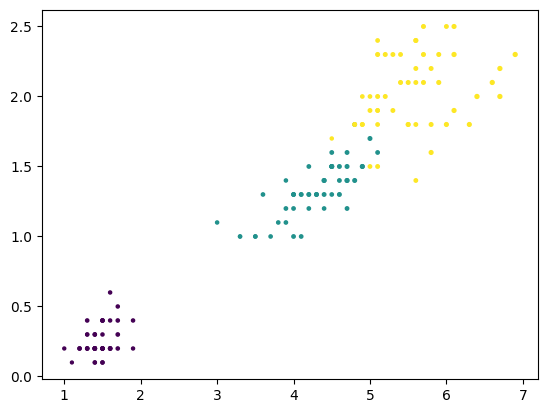

In [43]:

# Distribución
import matplotlib.pyplot as plt
plt.scatter(x = conjunto["petal length (cm)"],
            y = conjunto["petal width (cm)"],
            c = conjunto["target"],
            s = conjunto["sepal length (cm)"])

plt.xlabel("Largura pétalo")
plt.ylabel("Anchura pétalo")
plt.show()

array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>]], dtype=object)

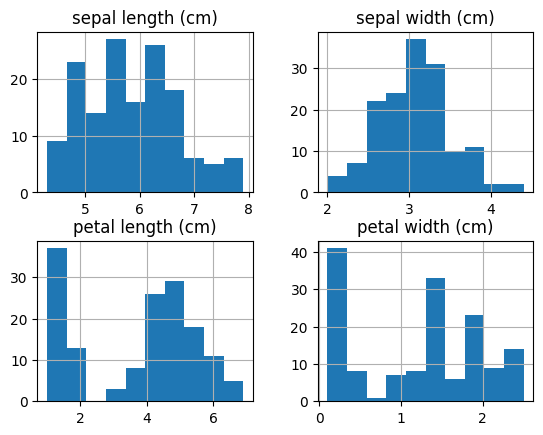

In [24]:
# Cajas
X.hist()

In [45]:
matriz_correlacion = conjunto.corr()
matriz_correlacion.style.background_gradient()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


>Las características más correlacionadas con la clase de flor son la largura y anchura del pétalo. También la largura del sépalo pero no tanto.

In [46]:
# División en conjunto de entrenamiento y test
from sklearn.model_selection import train_test_split
train, test = train_test_split(conjunto, train_size=0.2, random_state=5, stratify=conjunto["target"])

In [49]:
# División en X e y
X_train, y_train, X_test, y_test = train.drop("target", axis = 1), train["target"], test.drop("target", axis = 1), test["target"]

In [50]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
2,4.7,3.2,1.3,0.2
78,6.0,2.9,4.5,1.5
98,5.1,2.5,3.0,1.1
84,5.4,3.0,4.5,1.5
68,6.2,2.2,4.5,1.5
101,5.8,2.7,5.1,1.9
21,5.1,3.7,1.5,0.4
130,7.4,2.8,6.1,1.9
102,7.1,3.0,5.9,2.1
114,5.8,2.8,5.1,2.4


In [51]:
y_train

2      0
78     1
98     1
84     1
68     1
101    2
21     0
130    2
102    2
114    2
29     0
134    2
6      0
131    2
28     0
60     1
87     1
19     0
17     0
54     1
70     1
42     0
116    2
145    2
90     1
3      0
107    2
91     1
43     0
103    2
Name: target, dtype: int32

In [52]:
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
24,4.8,3.4,1.9,0.2
66,5.6,3.0,4.5,1.5
104,6.5,3.0,5.8,2.2
56,6.3,3.3,4.7,1.6
8,4.4,2.9,1.4,0.2
...,...,...,...,...
75,6.6,3.0,4.4,1.4
26,5.0,3.4,1.6,0.4
4,5.0,3.6,1.4,0.2
93,5.0,2.3,3.3,1.0


In [53]:
y_test

24     0
66     1
104    2
56     1
8      0
      ..
75     1
26     0
4      0
93     1
94     1
Name: target, Length: 120, dtype: int32

In [56]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier


# Pipeline
# Imputador para valores vacíos
# Estandarización
# Algoritmo de RFC
modelo = make_pipeline(
    SimpleImputer(),
    StandardScaler(),
    RandomForestClassifier(n_estimators=150,
                           random_state=5)
)

# Entrenamiento
modelo.fit(X_test, y_test)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=150, random_state=5))])

In [87]:
from sklearn.model_selection import cross_val_score
metricas = cross_val_score(modelo, X_train, y_train, scoring="f1_macro", cv=5)
metricas

array([1.        , 1.        , 1.        , 0.82222222, 1.        ])

>He utilizado la métrica F1 que combina las métricas de precisión y sensibilidad. Por defecto se utiliza la métrica de exactitud (accuracy), pero está métrica no es la ideal en algoritmos de clasificación, ya que clasificadores "tontos" que predicen la clase más abundante pueden conseguir una métrica de exactitud alta, por lo que es preferible utilizar una que tenga en cuenta los verdaderos negativos, verdaderos positivos, falsos negativos y falsos positivos.

In [90]:
print(f"F1 del fold con peor error: {metricas.min()}")
print(f"F1 del fold con mejor error: {metricas.max()}")

F1 del fold con peor error: 0.8222222222222223
F1 del fold con mejor error: 1.0


In [94]:
# Búsqueda exhaustiva del hiperparámetro de número de árboles
from sklearn.model_selection import GridSearchCV

parametros = {
    "randomforestclassifier__n_estimators": [50, 100, 150, 200, 250, 300]
}

busqueda_exhaustiva = GridSearchCV(modelo, parametros, scoring="f1_macro", cv = 5)
busqueda_exhaustiva.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(n_estimators=150,
                                                               random_state=5))]),
             param_grid={'randomforestclassifier__n_estimators': [50, 100, 150,
                                                                  200, 250,
                                                                  300]},
             scoring='f1_macro')

In [95]:
busqueda_exhaustiva.best_params_

{'randomforestclassifier__n_estimators': 50}

>De la lista de parámetros que ha probado el mejor número de árboles es 50

In [96]:
from sklearn.metrics import f1_score

print(f'F1 del modelo en el conjunto de prueba: {f1_score(y_test, modelo.predict(X_test), average="macro")}')

F1 del modelo en el conjunto de prueba: 1.0


In [97]:
import joblib
joblib.dump(busqueda_exhaustiva.best_estimator_, "Mejor_RFC.pkl")

['Mejor_RFC.pkl']

## EJERCICIO 2

En este ejercicio, trabajarás con un conjunto de datos de pruebas creados (ejercicio2.csv). 

Tu objetivo es construir un modelo de regresión que pueda predecir con precisión la variable dependiente y a partir de las variables independientes x1 y x2. 

Deberás:
* Cargar los datos
* Visualizar gráficamente los datos (x1 respecto a y e x2 respecto a y)
* Dividir los datos en conjunto de entrenamiento y pruebas
* Probar diferentes modelos de regresión polinómica, hasta ver cuál es el mejor degree (y explicarlo gráficamente y por medida del error en los conjuntos de entrenamiento y pruebas), no hace falta que uses validación cruzada. ¿Qué medición has usado para evaluar el modelo y por qué? ¿cuál es el mejor degree?
* Probar ahora con Elastic Net, optimizando los hiperparámetros con búsqueda exhaustiva, ¿ha mejorado con esta regularización? ¿cuáles son los mejores datos para los hiperparámetros?

In [329]:
# Carga de datos
dataset = pd.read_csv("ejercicio2.csv")
dataset

,x1,x2,y
0,0.488135,3.115185,-91.197936
1,2.151894,-0.239160,-44.928270
2,1.027634,0.231560,-5.347793
3,0.448832,-2.494794,78.026649
4,-0.763452,1.050430,2.176875
...,...,...,...
1995,2.912816,-1.503606,-54.720299
1996,2.211981,-0.651264,-39.841896
1997,-0.198922,3.300029,-104.087315
1998,1.438640,4.328062,-303.627063


In [122]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2000 non-null   float64
 1   x2      2000 non-null   float64
 2   y       2000 non-null   float64
dtypes: float64(3)
memory usage: 47.0 KB


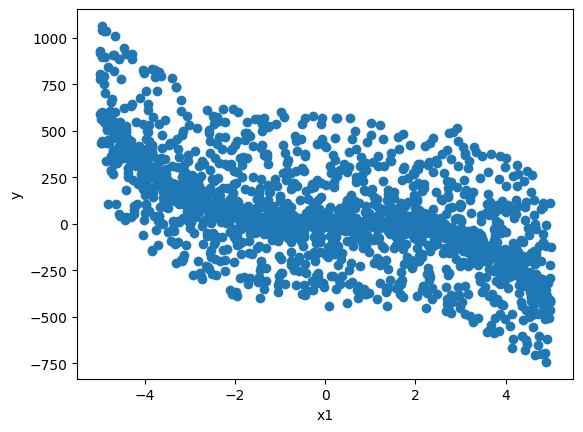

In [330]:
# x1 respecto a y
plt.scatter(x = dataset["x1"], y = dataset["y"])
plt.xlabel("x1")
plt.ylabel("y")
plt.show()

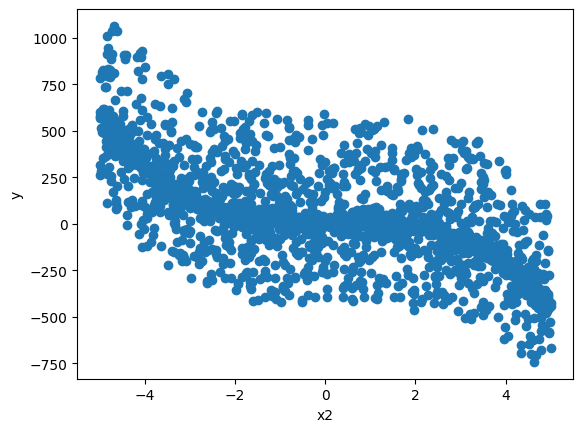

In [124]:
# x2 respecto a y
plt.scatter(x = dataset["x2"], y = dataset["y"])
plt.xlabel("x2")
plt.ylabel("y")
plt.show()

In [331]:
# Separamos la X y la y
X, y = dataset.drop("y", axis = 1), dataset["y"]

In [332]:
# Separamos conjunto de entrenamiento y pruebas.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [139]:
X_train

,x1,x2
1176,-1.104515,-0.375736
1128,-3.719791,-4.519222
184,4.342140,3.490286
1807,-4.716371,-2.024812
35,1.176355,3.051275
...,...,...
1142,-2.787819,-3.378291
998,-2.713534,3.135450
1725,-3.039992,-3.551239
206,1.793928,0.315677


In [140]:
y_train

1176      2.482862
1128    710.709686
184    -420.611242
1807    552.453440
35      -88.538676
           ...    
1142    307.558015
998      16.666204
1725    369.426871
206     -17.138854
867     -97.382115
Name: y, Length: 1600, dtype: float64

In [141]:
X_test

,x1,x2
51,-0.613985,-4.507147
1327,-4.348785,-1.773370
1488,-1.255860,-1.223092
1432,-0.912262,1.849379
417,-4.879638,-3.071193
...,...,...
1251,0.552941,-4.937622
275,4.493188,0.816798
1114,-0.586259,-1.534658
1751,-1.157268,-1.934006


In [333]:

# Degree 2
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

modelo_pol2 = make_pipeline(
    PolynomialFeatures(degree=2),
    StandardScaler(),
    LinearRegression()
)

modelo_pol2.fit(X_train, y_train)
ECM2_train = mean_squared_error(y_train, modelo_pol2.predict(X_train))
ECM2 = mean_squared_error(y_test, modelo_pol2.predict(X_test))

In [334]:
# Degree 3

modelo_pol3 = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearRegression()
)

modelo_pol3.fit(X_train, y_train)
ECM3_train = mean_squared_error(y_train, modelo_pol3.predict(X_train))
ECM3 = (mean_squared_error(y_test, modelo_pol3.predict(X_test)))

In [335]:
# Degree 4
modelo_pol4 = make_pipeline(
    PolynomialFeatures(degree=4),
    StandardScaler(),
    LinearRegression()
)

modelo_pol4.fit(X_train, y_train)
ECM4_train = mean_squared_error(y_train, modelo_pol4.predict(X_train))
ECM4 = (mean_squared_error(y_test, modelo_pol4.predict(X_test)))

In [336]:
# Degree 4
modelo_pol5 = make_pipeline(
    PolynomialFeatures(degree=5),
    StandardScaler(),
    LinearRegression()
)

modelo_pol5.fit(X_train, y_train)
ECM5_train = mean_squared_error(y_train, modelo_pol5.predict(X_train))
ECM5 = (mean_squared_error(y_test, modelo_pol5.predict(X_test)))

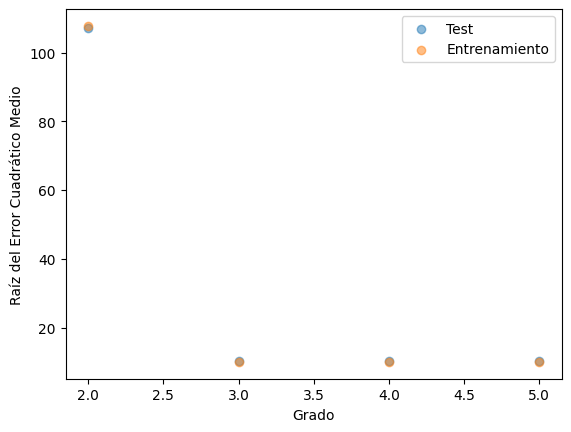

In [339]:
degrees = [2, 3, 4, 5]
RECMs_train = [sqrt(ECM2_train), sqrt(ECM3_train), sqrt(ECM4_train), sqrt(ECM5_train)]
RECMs = ([sqrt(ECM2), sqrt(ECM3), sqrt(ECM4), sqrt(ECM5)])

plt.scatter(x = degrees,
            y = RECMs,
            label = "Test",
            alpha=0.5)

plt.scatter(x = degrees,
            y = RECMs_train,
            label = "Entrenamiento",
            alpha=0.5)

plt.xlabel("Grado")
plt.ylabel("Raíz del Error Cuadrático Medio")
plt.legend()
plt.show()

In [168]:
print(RECMs)

[107.08138255608627, 10.241814050953728, 10.312265414060168, 10.333843988652236]


In [340]:
print(RECMs_train)

[107.77121148501267, 10.026717711778426, 9.99489868844006, 9.985927634142305]


>En tareas de regresión, la métrica de exactitud no tiene sentido, pues una diferencia de 0.0001 entre el valor real y el valor predicho sería una predicción errónea aunque se acerque mucho. Por ello se utilizan otras métricas que tienen en cuenta la diferencia entre el valor real y el predicho, como el Error Cuadrático Medio o la Raíz del Error Cuadrático Medio. El grado con menor RECM es el mejor, 3 en este caso para el conjunto de prueba.

In [180]:
# Prueba con Elastic Net
from sklearn.linear_model import ElasticNet

# Parametros para la búsqueda exhaustiva
# alpha, coeficiente que multiplica la penalización
# l1_ratio, parametro de reg. Si vale 0 es igual a Ridge y si es 1 es igual a Lasso. Un valor intermedio es una suma ponderada de ambas.
parametros_EN = {
    "elasticnet__alpha": [0.0001, 0.001, 0.1, 1, 10],
    "elasticnet__l1_ratio": [0.01, 0.25, 0.5, 0.75, 0.99]
}

modelo_EN = make_pipeline(
    StandardScaler(),
    ElasticNet(random_state=5)
)

# Antes he utilizado el RECM pero aquí el scoring es el valor negativo del RECM, ya que cuanto menor sea el RECM mejor, pero como Sklearn tiene la filosofía cuanto mayor el score mejor, se utiliza el negativo.
busqueda_exhaustiva_2 = GridSearchCV(modelo_EN, parametros_EN, scoring="neg_root_mean_squared_error")
busqueda_exhaustiva_2.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('elasticnet',
                                        ElasticNet(random_state=5))]),
             param_grid={'elasticnet__alpha': [0.0001, 0.001, 0.1, 1, 10],
                         'elasticnet__l1_ratio': [0.01, 0.25, 0.5, 0.75, 0.99]},
             scoring='neg_root_mean_squared_error')

In [181]:
sqrt(mean_squared_error(y_test, busqueda_exhaustiva_2.best_estimator_.predict(X_test)))

110.00475242903966

>Con los hiperparámetros seleccionados no lo ha mejorado.

In [179]:
busqueda_exhaustiva_2.best_params_

{'elasticnet__alpha': 0.001, 'elasticnet__l1_ratio': 0.01}

>Los mejores valores son 0.001 para alpha y 0.01 para el l1_ratio, casi Ridge.

## EJERCICIO 3

Carga el conjunto de datos winequality.csv, intentamos predecir la calidad del vino (quality) a partir del resto de características, explora los datos y divide el conjunto de datos en entrenamiento y pruebas (10% para las pruebas).

Crea un pipeline para preparar los datos y aplicar un algoritmo de máquinas de vector soporte, entrena el modelo (guarda el tiempo que tardas en entrenar el modelo) y evalúa el modelo en el conjunto de pruebas (no hace falta que pruebes con diferentes hiperparámetros...)

Crea un pipeline para preparar los datos y aplicar PCA que explique al menos el 95% de la varianza, aplica esta pipeline al conjunto de entrenamiento y al conjunto de pruebas.

Muestra cuantas dimensiones tenías al principio y cuantas después de aplicar PCA.

Aplica a los datos obtenido de aplicar PCA el algoritmo de máquinas de vector soporte, entrena el modelo (guarda el tiempo que tardas en entrenar el modelo) y evalúa el modelo en el conjunto de pruebas (no hace falta que pruebes con diferentes hiperparámetros...)

Compara el error y el tiempo empleado en los dos modelos (sin pca y con pca) e interpreta el resultado.


In [341]:
dataset_vino = pd.read_csv("winequality.csv", delimiter=";")
dataset_vino

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [278]:
dataset_vino.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [279]:
dataset_vino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


>No tiene valores nulos.

In [342]:
# Separacion conjunto de entrenamiento y prueba
X, y = dataset_vino.drop("quality", axis = 1), dataset_vino["quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=5)

In [346]:
# Entrenamiento del modelo SVC
from sklearn.svm import SVC
modelo_SVC = make_pipeline(
    StandardScaler(),
    SVC(random_state=5)
)

%time modelo_SVC.fit(X_train, y_train)

CPU times: total: 46.9 ms
Wall time: 43 ms


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=5))])

In [347]:
# Evaluación del modelo
from sklearn.metrics import precision_score
precision_score(y_test, modelo_SVC.predict(X_test), average="macro", zero_division=0.0)

0.41470588235294115

In [357]:
# Reduccion de dimensionalidad con PCA
from sklearn.decomposition import PCA

red_PCA = make_pipeline(
    StandardScaler(),
    PCA(n_components=0.95, random_state=5)
)

# Aplicamos la reduccion a los conjuntos de entrenamiento y prueba.
X_train_red = red_PCA.fit_transform(X_train)
X_test_red = red_PCA.transform(X_test)

In [362]:
X.shape[1]

11

In [363]:
red_PCA.named_steps["pca"].n_components_

9

>El dataset original tenía 11 dimensiones y para preservar el 95% de varianza se ha podido reducir a 9 dimensiones

In [364]:
# Nuevo modelo para dataset reducido
modelo_SVC_red = make_pipeline(
    SVC(random_state=5)
)

%time modelo_SVC_red.fit(X_train_red, y_train)

CPU times: total: 15.6 ms
Wall time: 43 ms


Pipeline(steps=[('svc', SVC(random_state=5))])

In [366]:
# Evaluación
precision_score(y_test, modelo_SVC_red.predict(X_test_red), average="macro")

c:\Users\icjardin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.4030020703933747

>Conclusiones: el tiempo de entrenamiento se ha reducido considerablemente y el rendimiento solo ha disminuido ligeramente. Confirma el concepto de que cuando se aplica la reducción de dimensionalidad a un conjunto se pueden obtener rendimientos similares en mucho menos tiempo.

## EJERCICIO 4

Una empresa de coches ha sacado un nuevo modelo al mercado. Le ha preguntado a una red social quién ha comprado el producto, recaudando el sexo, la edad y el salario de cada uno de ellos. Ahora queremos construir un modelo que nos permita determinar con estos atributos si la persona comprará el producto o no, para tomar medidas en función de la respuesta para que lo acabe comprando.

Los datos están en el csv

### RECOPILACIÓN Y RECOLECCIÓN DE LOS DATOS

####  OBTENER LOS DATOS

In [301]:
dataset_compras = pd.read_csv("compras.csv")

,Identificador,Sexo,Edad,Salario,Compra
0,15624510,Hombre,19,19000,0
1,15810944,Hombre,35,20000,0
2,15668575,Mujer,26,43000,0
3,15603246,Mujer,27,57000,0
4,15804002,Hombre,19,76000,0
...,...,...,...,...,...
395,15691863,Mujer,46,41000,1
396,15706071,Hombre,51,23000,1
397,15654296,Mujer,50,20000,1
398,15755018,Hombre,36,33000,0


#### EXPLORAR LOS DATOS 
Con exhaustividad: datos estadísticos, gráficos, correlaciones... e indicar las deduciones a las que llegas

In [302]:
dataset_compras

,Identificador,Sexo,Edad,Salario,Compra
0,15624510,Hombre,19,19000,0
1,15810944,Hombre,35,20000,0
2,15668575,Mujer,26,43000,0
3,15603246,Mujer,27,57000,0
4,15804002,Hombre,19,76000,0
...,...,...,...,...,...
395,15691863,Mujer,46,41000,1
396,15706071,Hombre,51,23000,1
397,15654296,Mujer,50,20000,1
398,15755018,Hombre,36,33000,0


>Vemos las columnas Identificador (pare un ID de usuario), el sexo de la persona, la edad de la persona, su salario y por último en la columna compra un 0 si no lo ha comprado y un 1 si sí.

In [303]:
dataset_compras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Identificador  400 non-null    int64 
 1   Sexo           400 non-null    object
 2   Edad           400 non-null    int64 
 3   Salario        400 non-null    int64 
 4   Compra         400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


>No contiene filas vacías, todas las columnas son de tipo entero excepto el sexo.

In [305]:
dataset_compras["Sexo"].value_counts()

Sexo
Mujer     204
Hombre    196
Name: count, dtype: int64

>Prácticamente la mitad hombres y la otra mitad mujeres.

In [304]:
dataset_compras.describe()

,Identificador,Edad,Salario,Compra
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


array([[<Axes: title={'center': 'Identificador'}>,
        <Axes: title={'center': 'Edad'}>],
       [<Axes: title={'center': 'Salario'}>,
        <Axes: title={'center': 'Compra'}>]], dtype=object)

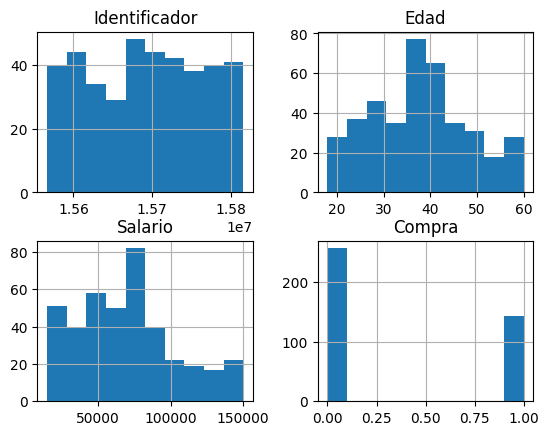

In [306]:
dataset_compras.hist()

>No se valora el ID ya que deducimos que no es una medida cuantitativa de nada. La edad de las personas parece seguir una distribución bastante normal, quizá algo escorada a la derecha pero solo ligeramente. En el gráfico del salario en cambio se puede apreciar que hay una media muy fuerte (muy frecuente) y que la distribución a cada lado de la media es distinta, es más frecuente el salario por debajo de la media.

In [307]:
matriz_correlacion_2 = dataset_compras.corr(numeric_only=True)
matriz_correlacion_2.style.background_gradient()

,Identificador,Edad,Salario,Compra
Identificador,1.000000,-0.000721,0.071097,0.007120
Edad,-0.000721,1.000000,0.155238,0.622454
Salario,0.071097,0.155238,1.000000,0.362083
Compra,0.007120,0.622454,0.362083,1.000000


>La característica mas correlacionada con la decisión o no de compra desde luego es la edad. El salario de la persona también parece estar correlacionada pero no tanto como la edad.

#### DIVIDIR LOS DATOS EN CONJUNTO DE ENTRENAMIENTO Y PRUEBAS

In [309]:
X, y = dataset_compras.drop("Compra", axis = 1), dataset_compras["Compra"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.15, random_state=5)

#### PREPARAR LOS DATOS
Algunas pistas a tener en cuenta (** esto no quiere decir que sólo haya que hacer esto**):
* No usar las características que no sirven
* Tratar los valores nulos (aunque ahora no haya)
* Edad: primeramente convertir en categórica poniendo las siguientes etiquetas y luego aplicar el cambio que procede en las variables categóricas (es para aplicar los diferentes tipos de transformaciones que hay, no porque tenga mucho sentido).
  * 0-20 --> Rango1
  * 20-30 --> Rango 2
  * 30-40 --> Rango 3
  * 40-50 --> Rango 4
  * 50- --> Rango 5

* Salario: aplicar logaritmo (aunque no tenga una cola larga a la derecha) y luego estandarizar

In [316]:
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
import numpy as np

# Procesamiento de edad, transformamos a variable categórica
def CategorizarEdad(df):
    # Se recibe una columna como Series de Pandas, lo transformamos a DF
    df = pd.DataFrame(df, columns = ["Edad"])
    # Lo transformamos con el método cut
    df["Edad"] = pd.cut(df["Edad"], bins = [0, 20, 30, 40, 50, np.inf], labels = ["Rango 1", "Rango 2", "Rango 3", "Rango 4", "Rango 5"])
    return df

# Función para el feature_names_out 
def nombres_CategorizarEdad(function_transformer, feature_names_in):
    return ["Edad"]

# Pipeline de edad
pipeline_edad = make_pipeline(
    SimpleImputer(), # Imputar valores donde no los hay
    FunctionTransformer(CategorizarEdad, feature_names_out=nombres_CategorizarEdad),
    # Una vez sea una variable categórica, aplicamos OneHotEncoder para separar los valores en características distintas para su correcto entrenamiento.
    OneHotEncoder(handle_unknown="ignore")
)

# Procesamiento de salario

# Función para el feature_names_out
def nombres_Salario(function_transformer, feature_names_in):
    return ["Salario"]

pipeline_salario = make_pipeline(
    SimpleImputer(), # Imputar valores donde no los hay
    FunctionTransformer(np.log, feature_names_out=nombres_Salario, validate=False),
    StandardScaler()
)

# Procesamiento Sexo

def ReemplazarSexo(df):
    return np.where(df == "Hombre", 0, 1)

def nombres_ReemplazarSexo(function_transformer, feature_names_in):
    return ["Sexo"]

pipeline_sexo = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    FunctionTransformer(ReemplazarSexo, feature_names_out=nombres_ReemplazarSexo)
)


pipeline_procesamiento = ColumnTransformer(
    [
        ("Edad", pipeline_edad, ["Edad"]),
        ("Salario", pipeline_salario, ["Salario"]),
        ("Sexo", pipeline_sexo, ["Sexo"])
    ],
    verbose_feature_names_out=False
)

In [323]:
# Prueba
X_train_copia = X_train.copy()

In [324]:
procesado = pipeline_procesamiento.fit_transform(X_train_copia)
procesado_df = pd.DataFrame(procesado, columns=pipeline_procesamiento.get_feature_names_out(), index=X_train_copia.index)

In [325]:
procesado_df

,Edad_Rango 2,Edad_Rango 3,Edad_Rango 4,Edad_Rango 5,Salario,Sexo
16,0.0,0.0,1.0,0.0,-1.822726,0.0
341,0.0,1.0,0.0,0.0,0.359185,0.0
217,0.0,1.0,0.0,0.0,0.437080,0.0
289,0.0,1.0,0.0,0.0,0.437080,1.0
78,1.0,0.0,0.0,0.0,0.653957,1.0
91,1.0,0.0,0.0,0.0,1.225311,1.0
183,0.0,1.0,0.0,0.0,-0.745637,0.0
323,0.0,0.0,1.0,0.0,-1.460624,1.0
267,0.0,1.0,0.0,0.0,0.332526,0.0
190,1.0,0.0,0.0,0.0,0.584263,0.0


In [326]:
# Misma transformación para el conjunto de test
X_test_copia = X_test.copy()
test_procesado = pipeline_procesamiento.fit_transform(X_test_copia)
test_procesado_df = pd.DataFrame(test_procesado, columns=pipeline_procesamiento.get_feature_names_out(), index=X_test_copia.index)
test_procesado_df

,Edad_Rango 1,Edad_Rango 2,Edad_Rango 3,Edad_Rango 4,Edad_Rango 5,Salario,Sexo
218,0.0,0.0,0.0,1.0,0.0,0.820091,1.0
191,1.0,0.0,0.0,0.0,0.0,-1.498197,1.0
117,0.0,0.0,1.0,0.0,0.0,-0.268024,0.0
50,0.0,1.0,0.0,0.0,0.0,-1.129686,1.0
348,0.0,0.0,1.0,0.0,0.0,0.428680,0.0
...,...,...,...,...,...,...,...
38,0.0,1.0,0.0,0.0,0.0,0.309524,1.0
265,0.0,0.0,0.0,1.0,0.0,1.029129,1.0
360,0.0,0.0,0.0,1.0,0.0,1.344471,0.0
14,1.0,0.0,0.0,0.0,0.0,0.540337,0.0
